# Extension de notre CNN : Modèle CNN-LSTM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import array, hstack

In [2]:
# Importation des packages de deep learning 
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from tensorflow.keras.layers import (TimeDistributed,Conv1D, Dense,Dropout, Flatten,MaxPooling1D, LSTM)
from tensorflow.keras import optimizers
from tensorflow.keras import models
#from keras.layers import TimeDistributed

In [25]:
# On importe la base effectuée dans la partie précedente (pour ne pas relancer tout le notebook)
X_Y = pd.read_csv(r'D:/Données/ENSAE/2A/S2/Séminaire de modélisation statistique/X_Y.csv')

In [26]:
X_Y = X_Y.drop('Unnamed: 0', axis= 1)

In [37]:
def split_sequences(sequences, n_steps) : 
    X, y = list(), list()
    n_iteration = int(len(sequences)/n_steps)
    if len(sequences)%n_steps != 0 : 
        print("Attention, modulo différent de zero")
    for i in range(n_iteration): 
        seq_x, seq_y = sequences [i*n_steps :(i+1)*n_steps, :-1 ], sequences[i*n_steps ,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)   

In [64]:
# Application de la fonction 
X, y = split_sequences(X_Y.values, 100)

In [65]:
print(X.shape, y.shape)

(6616, 100, 16) (6616,)


In [66]:
for i in range(6616):
    print(X[i], y[i])

[[1.01545254e-01 0.00000000e+00 4.86637987e-01 ... 0.00000000e+00
  1.40771330e-01 1.82300000e+03]
 [1.01545254e-01 0.00000000e+00 4.88332682e-01 ... 0.00000000e+00
  8.53174575e-02 1.82300000e+03]
 [1.01545254e-01 0.00000000e+00 4.82727154e-01 ... 0.00000000e+00
  1.98412701e-01 1.82300000e+03]
 ...
 [1.01545254e-01 0.00000000e+00 4.84943293e-01 ... 0.00000000e+00
  1.98412701e-01 1.82300000e+03]
 [1.01545254e-01 0.00000000e+00 4.85855821e-01 ... 0.00000000e+00
  1.66922919e-01 1.82300000e+03]
 [1.01545254e-01 0.00000000e+00 4.87811237e-01 ... 0.00000000e+00
  1.46825407e-01 1.82300000e+03]] -0.02776137
[[7.66004415e-01 0.00000000e+00 1.33359406e-01 ... 0.00000000e+00
  1.64682550e-01 1.82400000e+03]
 [7.66004415e-01 0.00000000e+00 1.37009516e-01 ... 0.00000000e+00
  1.76298350e-01 1.82400000e+03]
 [7.66004415e-01 0.00000000e+00 1.31012906e-01 ... 0.00000000e+00
  1.07142867e-01 1.82400000e+03]
 ...
 [7.66004415e-01 0.00000000e+00 1.35705905e-01 ... 0.00000000e+00
  8.53174575e-02 1.8

  1.42857152e-01 2.03400000e+03]] -0.007089104
[[7.57174393e-01 0.00000000e+00 1.35184461e-01 ... 0.00000000e+00
  5.75397110e-02 2.03500000e+03]
 [7.57174393e-01 0.00000000e+00 1.42354321e-01 ... 0.00000000e+00
  1.23015883e-01 2.03500000e+03]
 [7.57174393e-01 0.00000000e+00 1.38704211e-01 ... 0.00000000e+00
  1.13095248e-01 2.03500000e+03]
 ...
 [7.57174393e-01 0.00000000e+00 1.31534350e-01 ... 0.00000000e+00
  1.86507947e-01 2.03500000e+03]
 [7.57174393e-01 0.00000000e+00 1.36488072e-01 ... 0.00000000e+00
  1.44841279e-01 2.03500000e+03]
 [7.57174393e-01 0.00000000e+00 1.28405684e-01 ... 0.00000000e+00
  1.01190489e-01 2.03500000e+03]] -0.025873
[[1.76600442e-01 0.00000000e+00 3.39721027e-01 ... 0.00000000e+00
  9.12698346e-02 2.03600000e+03]
 [1.76600442e-01 0.00000000e+00 3.42197888e-01 ... 0.00000000e+00
  1.09126994e-01 2.03600000e+03]
 [1.76600442e-01 0.00000000e+00 3.34636944e-01 ... 0.00000000e+00
  1.88492086e-01 2.03600000e+03]
 ...
 [1.76600442e-01 0.00000000e+00 3.4480511

  6.94444651e-02 2.24100000e+03]] -0.006271169
[[8.83002208e-02 0.00000000e+00 5.16621040e-01 ... 0.00000000e+00
  1.54761915e-01 2.24200000e+03]
 [8.83002208e-02 0.00000000e+00 5.21574762e-01 ... 0.00000000e+00
  1.86507947e-01 2.24200000e+03]
 [8.83002208e-02 0.00000000e+00 5.20010429e-01 ... 0.00000000e+00
  1.74603181e-01 2.24200000e+03]
 ...
 [8.83002208e-02 0.00000000e+00 5.14013818e-01 ... 0.00000000e+00
  1.62698423e-01 2.24200000e+03]
 [8.83002208e-02 0.00000000e+00 5.18446096e-01 ... 0.00000000e+00
  1.52777788e-01 2.24200000e+03]
 [8.83002208e-02 0.00000000e+00 5.20140790e-01 ... 0.00000000e+00
  1.54761915e-01 2.24200000e+03]] -0.02862552
[[9.92641648e-01 3.33333333e-01 2.46382479e-02 ... 0.00000000e+00
  9.32539735e-02 2.24300000e+03]
 [9.92641648e-01 3.33333333e-01 1.47308043e-02 ... 0.00000000e+00
  1.86507947e-01 2.24300000e+03]
 [9.92641648e-01 3.33333333e-01 1.72076652e-02 ... 0.00000000e+00
  1.88492086e-01 2.24300000e+03]
 ...
 [9.92641648e-01 3.33333333e-01 1.82505

  1.86507947e-01 2.40400000e+03]] -0.111882
[[7.01250920e-01 0.00000000e+00 1.77682180e-01 ... 0.00000000e+00
  5.35714333e-02 2.40500000e+03]
 [7.01250920e-01 0.00000000e+00 1.81593013e-01 ... 0.00000000e+00
  1.42857152e-01 2.40500000e+03]
 [7.01250920e-01 0.00000000e+00 1.83287707e-01 ... 0.00000000e+00
  1.56746042e-01 2.40500000e+03]
 ...
 [7.01250920e-01 0.00000000e+00 1.77160735e-01 ... 0.00000000e+00
  1.34920645e-01 2.40500000e+03]
 [7.01250920e-01 0.00000000e+00 1.89936123e-01 ... 0.00000000e+00
  1.23015883e-01 2.40500000e+03]
 [7.01250920e-01 0.00000000e+00 1.88762873e-01 ... 0.00000000e+00
  1.03174612e-01 2.40500000e+03]] -0.001642385
[[1.23620309e-01 0.00000000e+00 1.50175987e-01 ... 0.00000000e+00
  1.62698423e-01 2.40600000e+03]
 [1.23620309e-01 0.00000000e+00 1.46265154e-01 ... 0.00000000e+00
  1.86507947e-01 2.40600000e+03]
 [1.23620309e-01 0.00000000e+00 1.40529266e-01 ... 0.00000000e+00
  1.44841279e-01 2.40600000e+03]
 ...
 [1.23620309e-01 0.00000000e+00 1.4131143

  1.83504364e-01 2.55100000e+03]] -0.01854995
[[9.74245769e-01 0.00000000e+00 1.56433320e-03 ... 0.00000000e+00
  1.28968264e-01 2.55200000e+03]
 [9.74245769e-01 0.00000000e+00 1.91630817e-02 ... 0.00000000e+00
  7.34995865e-02 2.55200000e+03]
 [9.74245769e-01 0.00000000e+00 1.44700821e-02 ... 0.00000000e+00
  7.93650804e-02 2.55200000e+03]
 ...
 [9.74245769e-01 0.00000000e+00 6.90913831e-03 ... 0.00000000e+00
  1.46825407e-01 2.55200000e+03]
 [9.74245769e-01 0.00000000e+00 1.05592491e-02 ... 0.00000000e+00
  5.55555721e-02 2.55200000e+03]
 [9.74245769e-01 0.00000000e+00 1.82505540e-02 ... 0.00000000e+00
  1.23015883e-01 2.55200000e+03]] 0.02303636
[[1.39072848e-01 3.33333333e-01 2.65806283e-01 ... 0.00000000e+00
  1.36462135e-01 2.55300000e+03]
 [1.39072848e-01 3.33333333e-01 2.58375701e-01 ... 0.00000000e+00
  1.98412701e-01 2.55300000e+03]
 [1.39072848e-01 3.33333333e-01 2.70499283e-01 ... 0.00000000e+00
  1.86507947e-01 2.55300000e+03]
 ...
 [1.39072848e-01 3.33333333e-01 2.7597444

  1.50793661e-01 2.69500000e+03]] 0.01774587
[[1.65562914e-01 0.00000000e+00 2.59679312e-01 ... 0.00000000e+00
  1.17063502e-01 2.69600000e+03]
 [1.65562914e-01 0.00000000e+00 2.53030896e-01 ... 0.00000000e+00
  1.01190489e-01 2.69600000e+03]
 [1.65562914e-01 0.00000000e+00 2.53552340e-01 ... 0.00000000e+00
  1.76587308e-01 2.69600000e+03]
 ...
 [1.65562914e-01 0.00000000e+00 2.56159562e-01 ... 0.00000000e+00
  1.58730169e-01 2.69600000e+03]
 [1.65562914e-01 0.00000000e+00 2.47946813e-01 ... 0.00000000e+00
  1.76587308e-01 2.69600000e+03]
 [1.65562914e-01 0.00000000e+00 2.60200756e-01 ... 0.00000000e+00
  1.26984137e-01 2.69600000e+03]] -0.4546025
[[2.50183959e-02 0.00000000e+00 2.05840177e-01 ... 0.00000000e+00
  1.71364498e-01 2.69700000e+03]
 [2.50183959e-02 0.00000000e+00 2.01407900e-01 ... 0.00000000e+00
  8.93407721e-02 2.69700000e+03]
 [2.50183959e-02 0.00000000e+00 2.19397732e-01 ... 0.00000000e+00
  1.68650802e-01 2.69700000e+03]
 ...
 [2.50183959e-02 0.00000000e+00 2.15617260

  9.92063506e-02 2.80500000e+03]] -0.08899145
[[2.35467255e-02 0.00000000e+00 2.10142094e-01 ... 0.00000000e+00
  1.92460325e-01 2.80600000e+03]
 [2.35467255e-02 0.00000000e+00 2.25133620e-01 ... 0.00000000e+00
  1.76587310e-01 2.80600000e+03]
 [2.35467255e-02 0.00000000e+00 2.13792204e-01 ... 0.00000000e+00
  1.64682548e-01 2.80600000e+03]
 ...
 [2.35467255e-02 0.00000000e+00 2.21744232e-01 ... 0.00000000e+00
  1.98412706e-01 2.80600000e+03]
 [2.35467255e-02 0.00000000e+00 2.13922566e-01 ... 0.00000000e+00
  7.73809615e-02 2.80600000e+03]
 [2.35467255e-02 0.00000000e+00 2.18745926e-01 ... 0.00000000e+00
  1.70634929e-01 2.80600000e+03]] -0.0481297785677916
[[1.11111111e-01 0.00000000e+00 3.37113805e-01 ... 0.00000000e+00
  1.26821388e-01 2.80700000e+03]
 [1.11111111e-01 0.00000000e+00 3.55494720e-01 ... 0.00000000e+00
  7.53968422e-02 2.80700000e+03]
 [1.11111111e-01 0.00000000e+00 3.54321470e-01 ... 0.00000000e+00
  9.32539735e-02 2.80700000e+03]
 ...
 [1.11111111e-01 0.00000000e+00 

  1.50793661e-01 2.95200000e+03]] 0.06560519
[[8.18984547e-01 0.00000000e+00 1.26710989e-01 ... 0.00000000e+00
  7.53968422e-02 2.95300000e+03]
 [8.18984547e-01 0.00000000e+00 1.21887629e-01 ... 0.00000000e+00
  8.13492193e-02 2.95300000e+03]
 [8.18984547e-01 0.00000000e+00 1.08851519e-01 ... 3.33333333e-01
  1.74603181e-01 2.95300000e+03]
 ...
 [8.18984547e-01 0.00000000e+00 1.19410768e-01 ... 0.00000000e+00
  1.74603181e-01 2.95300000e+03]
 [8.18984547e-01 0.00000000e+00 1.16412463e-01 ... 0.00000000e+00
  1.62698423e-01 2.95300000e+03]
 [8.18984547e-01 0.00000000e+00 1.27623517e-01 ... 0.00000000e+00
  1.74603181e-01 2.95300000e+03]] -0.02698861
[[7.50551876e-02 0.00000000e+00 1.66992569e-01 ... 0.00000000e+00
  1.76587308e-01 2.95400000e+03]
 [7.50551876e-02 0.00000000e+00 1.67905097e-01 ... 0.00000000e+00
  1.03174612e-01 2.95400000e+03]
 [7.50551876e-02 0.00000000e+00 1.69860514e-01 ... 0.00000000e+00
  1.48809534e-01 2.95400000e+03]
 ...
 [7.50551876e-02 0.00000000e+00 1.8172337

  1.88492086e-01 3.09600000e+03]] -0.04882456
[[4.56217807e-02 0.00000000e+00 2.41298397e-01 ... 0.00000000e+00
  1.58730169e-01 3.09700000e+03]
 [4.56217807e-02 0.00000000e+00 2.28914092e-01 ... 0.00000000e+00
  1.28968264e-01 3.09700000e+03]
 [4.56217807e-02 0.00000000e+00 2.35041064e-01 ... 0.00000000e+00
  1.28968264e-01 3.09700000e+03]
 ...
 [4.56217807e-02 0.00000000e+00 2.41168035e-01 ... 0.00000000e+00
  1.58730169e-01 3.09700000e+03]
 [4.56217807e-02 0.00000000e+00 2.24221092e-01 ... 0.00000000e+00
  1.58730169e-01 3.09700000e+03]
 [4.56217807e-02 0.00000000e+00 2.36083953e-01 ... 0.00000000e+00
  1.50793661e-01 3.09700000e+03]] -0.05162021
[[2.56806475e-01 0.00000000e+00 3.15343501e-01 ... 0.00000000e+00
  7.14285645e-02 3.09800000e+03]
 [2.56806475e-01 0.00000000e+00 3.07782558e-01 ... 0.00000000e+00
  1.74603181e-01 3.09800000e+03]
 [2.56806475e-01 0.00000000e+00 3.02177030e-01 ... 0.00000000e+00
  1.74392102e-01 3.09800000e+03]
 ...
 [2.56806475e-01 0.00000000e+00 2.930517

  1.50793659e-01 3.27000000e+03]] -0.0210805695186875
[[2.09713024e-01 0.00000000e+00 4.91461348e-01 ... 0.00000000e+00
  1.76587308e-01 3.27100000e+03]
 [2.09713024e-01 0.00000000e+00 5.02672403e-01 ... 0.00000000e+00
  9.32539735e-02 3.27100000e+03]
 [2.09713024e-01 0.00000000e+00 4.90157737e-01 ... 0.00000000e+00
  1.42857152e-01 3.27100000e+03]
 ...
 [2.09713024e-01 0.00000000e+00 5.09581541e-01 ... 0.00000000e+00
  1.85243606e-01 3.27100000e+03]
 [2.09713024e-01 0.00000000e+00 4.90809542e-01 ... 0.00000000e+00
  7.93650804e-02 3.27100000e+03]
 [2.09713024e-01 0.00000000e+00 4.94198931e-01 ... 0.00000000e+00
  1.06630719e-01 3.27100000e+03]] 0.01114032
[[3.45106696e-01 3.33333333e-01 3.45326555e-01 ... 0.00000000e+00
  1.64682550e-01 3.27200000e+03]
 [3.45106696e-01 3.33333333e-01 3.40763916e-01 ... 0.00000000e+00
  1.13095248e-01 3.27200000e+03]
 [3.45106696e-01 3.33333333e-01 3.45065832e-01 ... 0.00000000e+00
  1.56746042e-01 3.27200000e+03]
 ...
 [3.45106696e-01 3.33333333e-01 3

  9.72222117e-02 3.45200000e+03]] -0.02851263
[[6.39440765e-01 0.00000000e+00 9.08616869e-02 ... 0.00000000e+00
  1.03174612e-01 3.45300000e+03]
 [6.39440765e-01 0.00000000e+00 7.24807717e-02 ... 0.00000000e+00
  1.68650804e-01 3.45300000e+03]
 [6.39440765e-01 0.00000000e+00 6.83092165e-02 ... 0.00000000e+00
  1.50793661e-01 3.45300000e+03]
 ...
 [6.39440765e-01 0.00000000e+00 1.00378047e-01 ... 0.00000000e+00
  1.78571435e-01 3.45300000e+03]
 [6.39440765e-01 0.00000000e+00 5.74892452e-02 ... 0.00000000e+00
  1.60714296e-01 3.45300000e+03]
 [6.39440765e-01 0.00000000e+00 5.72285230e-02 ... 3.33333333e-01
  1.98412701e-01 3.45300000e+03]] -0.0176396
[[7.01250920e-01 0.00000000e+00 1.63342459e-01 ... 0.00000000e+00
  1.53023445e-01 3.45400000e+03]
 [7.01250920e-01 0.00000000e+00 1.40529266e-01 ... 0.00000000e+00
  1.17063502e-01 3.45400000e+03]
 [7.01250920e-01 0.00000000e+00 1.56694042e-01 ... 0.00000000e+00
  1.47417425e-01 3.45400000e+03]
 ...
 [7.01250920e-01 0.00000000e+00 1.5304393

  1.82280158e-01 3.62000000e+03]] -0.01434512
[[1.68506255e-01 0.00000000e+00 1.05331769e-01 ... 0.00000000e+00
  1.51313897e-01 3.62100000e+03]
 [1.68506255e-01 0.00000000e+00 1.07808630e-01 ... 0.00000000e+00
  1.58730169e-01 3.62100000e+03]
 [1.68506255e-01 0.00000000e+00 1.01029853e-01 ... 3.33333333e-01
  1.78571435e-01 3.62100000e+03]
 ...
 [1.68506255e-01 0.00000000e+00 9.32081867e-02 ... 0.00000000e+00
  1.44716449e-01 3.62100000e+03]
 [1.68506255e-01 0.00000000e+00 9.28171034e-02 ... 0.00000000e+00
  1.42857152e-01 3.62100000e+03]
 [1.68506255e-01 0.00000000e+00 9.47725199e-02 ... 3.33333333e-01
  1.78571435e-01 3.62100000e+03]] -0.07652406
[[1.33922001e-01 0.00000000e+00 2.41428758e-01 ... 0.00000000e+00
  1.26984137e-01 3.62200000e+03]
 [1.33922001e-01 0.00000000e+00 2.55898840e-01 ... 0.00000000e+00
  1.56746042e-01 3.62200000e+03]
 [1.33922001e-01 0.00000000e+00 2.57202451e-01 ... 0.00000000e+00
  1.13095248e-01 3.62200000e+03]
 ...
 [1.33922001e-01 0.00000000e+00 2.449485

  1.66666677e-01 3.77900000e+03]] -0.0391289
[[6.76968359e-02 0.00000000e+00 4.22500326e-01 ... 0.00000000e+00
  7.73809811e-02 3.78000000e+03]
 [6.76968359e-02 0.00000000e+00 4.26671881e-01 ... 0.00000000e+00
  1.78571435e-01 3.78000000e+03]
 [6.76968359e-02 0.00000000e+00 4.50527962e-01 ... 0.00000000e+00
  1.88492086e-01 3.78000000e+03]
 ...
 [6.76968359e-02 0.00000000e+00 4.36318603e-01 ... 0.00000000e+00
  1.25000010e-01 3.78000000e+03]
 [6.76968359e-02 0.00000000e+00 4.35536436e-01 ... 0.00000000e+00
  1.48809534e-01 3.78000000e+03]
 [6.76968359e-02 0.00000000e+00 4.46095685e-01 ... 3.33333333e-01
  1.88492086e-01 3.78000000e+03]] -0.03057292
[[2.92126564e-01 0.00000000e+00 2.46382479e-02 ... 0.00000000e+00
  1.05158739e-01 3.78100000e+03]
 [2.92126564e-01 0.00000000e+00 3.38938861e-03 ... 0.00000000e+00
  4.16666791e-02 3.78100000e+03]
 [2.92126564e-01 0.00000000e+00 3.12866641e-03 ... 0.00000000e+00
  9.52381123e-02 3.78100000e+03]
 ...
 [2.92126564e-01 0.00000000e+00 6.7787772

  1.42857152e-01 3.93700000e+03]] -0.03015143
[[5.15084621e-03 0.00000000e+00 2.29305175e-01 ... 3.33333333e-01
  1.73913752e-01 3.93800000e+03]
 [5.15084621e-03 0.00000000e+00 2.37257202e-01 ... 0.00000000e+00
  1.15079374e-01 3.93800000e+03]
 [5.15084621e-03 0.00000000e+00 2.14704732e-01 ... 0.00000000e+00
  9.92063582e-02 3.93800000e+03]
 ...
 [5.15084621e-03 0.00000000e+00 2.34389258e-01 ... 3.33333333e-01
  1.68650802e-01 3.93800000e+03]
 [5.15084621e-03 0.00000000e+00 2.32042758e-01 ... 0.00000000e+00
  1.76587310e-01 3.93800000e+03]
 [5.15084621e-03 0.00000000e+00 2.41037674e-01 ... 6.66666667e-01
  1.68650802e-01 3.93800000e+03]] -0.0432796950016407
[[9.19793966e-02 0.00000000e+00 3.18732890e-01 ... 0.00000000e+00
  1.64682550e-01 3.93900000e+03]
 [9.19793966e-02 0.00000000e+00 3.35158389e-01 ... 0.00000000e+00
  1.25000010e-01 3.93900000e+03]
 [9.19793966e-02 0.00000000e+00 3.36331639e-01 ... 0.00000000e+00
  6.54761874e-02 3.93900000e+03]
 ...
 [9.19793966e-02 0.00000000e+00 

  4.36508032e-02 4.09300000e+03]] -0.0830915414000834
[[6.88005887e-01 0.00000000e+00 3.10259419e-02 ... 0.00000000e+00
  1.56746042e-01 4.09400000e+03]
 [6.88005887e-01 0.00000000e+00 4.17155521e-03 ... 0.00000000e+00
  1.98412701e-01 4.09400000e+03]
 [6.88005887e-01 0.00000000e+00 1.00378047e-02 ... 0.00000000e+00
  1.30952391e-01 4.09400000e+03]
 ...
 [6.88005887e-01 0.00000000e+00 3.07652197e-02 ... 0.00000000e+00
  1.66920045e-01 4.09400000e+03]
 [6.88005887e-01 0.00000000e+00 7.95202712e-03 ... 0.00000000e+00
  1.38888897e-01 4.09400000e+03]
 [6.88005887e-01 0.00000000e+00 8.86455482e-03 ... 0.00000000e+00
  9.92063506e-02 4.09400000e+03]] 0.0009151658
[[2.00147167e-01 0.00000000e+00 4.34754269e-01 ... 0.00000000e+00
  8.92857352e-02 4.09500000e+03]
 [2.00147167e-01 0.00000000e+00 4.43358102e-01 ... 0.00000000e+00
  1.08561376e-01 4.09500000e+03]
 [2.00147167e-01 0.00000000e+00 4.17546604e-01 ... 0.00000000e+00
  1.13095248e-01 4.09500000e+03]
 ...
 [2.00147167e-01 0.00000000e+00

  8.53174575e-02 4.22800000e+03]] -0.01287986
[[2.20750552e-01 0.00000000e+00 2.98135836e-01 ... 0.00000000e+00
  1.23015883e-01 4.22900000e+03]
 [2.20750552e-01 0.00000000e+00 3.06739669e-01 ... 0.00000000e+00
  1.58730169e-01 4.22900000e+03]
 [2.20750552e-01 0.00000000e+00 3.09737974e-01 ... 0.00000000e+00
  9.72222117e-02 4.22900000e+03]
 ...
 [2.20750552e-01 0.00000000e+00 3.18341807e-01 ... 0.00000000e+00
  1.36904772e-01 4.22900000e+03]
 [2.20750552e-01 0.00000000e+00 2.96832225e-01 ... 0.00000000e+00
  1.30952391e-01 4.22900000e+03]
 [2.20750552e-01 0.00000000e+00 2.99309086e-01 ... 0.00000000e+00
  1.36904772e-01 4.22900000e+03]] -0.04455556
[[3.16409124e-02 0.00000000e+00 2.77929866e-01 ... 0.00000000e+00
  1.98412706e-01 4.23000000e+03]
 [3.16409124e-02 0.00000000e+00 2.61895450e-01 ... 0.00000000e+00
  1.76587310e-01 4.23000000e+03]
 [3.16409124e-02 0.00000000e+00 2.81058532e-01 ... 0.00000000e+00
  1.66666675e-01 4.23000000e+03]
 ...
 [3.16409124e-02 0.00000000e+00 2.744101

  1.74603181e-01 4.43800000e+03]] -0.02476317
[[2.71523179e-01 0.00000000e+00 2.07404510e-01 ... 0.00000000e+00
  1.58730169e-01 4.43900000e+03]
 [2.71523179e-01 0.00000000e+00 2.09099205e-01 ... 0.00000000e+00
  1.09126994e-01 4.43900000e+03]
 [2.71523179e-01 0.00000000e+00 2.16920871e-01 ... 0.00000000e+00
  1.28968264e-01 4.43900000e+03]
 ...
 [2.71523179e-01 0.00000000e+00 2.03884761e-01 ... 3.33333333e-01
  1.78571435e-01 4.43900000e+03]
 [2.71523179e-01 0.00000000e+00 2.07274149e-01 ... 0.00000000e+00
  9.72222117e-02 4.43900000e+03]
 [2.71523179e-01 0.00000000e+00 2.13010038e-01 ... 0.00000000e+00
  1.68650804e-01 4.43900000e+03]] -0.073391
[[9.56585725e-02 0.00000000e+00 3.34245861e-01 ... 0.00000000e+00
  1.36904772e-01 4.44000000e+03]
 [9.56585725e-02 0.00000000e+00 3.48455221e-01 ... 0.00000000e+00
  9.32539735e-02 4.44000000e+03]
 [9.56585725e-02 0.00000000e+00 3.34115500e-01 ... 0.00000000e+00
  1.21031756e-01 4.44000000e+03]
 ...
 [9.56585725e-02 0.00000000e+00 3.34897667

  1.48716439e-01 4.61100000e+03]] -0.01215784
[[2.04562178e-01 0.00000000e+00 4.78685960e-01 ... 0.00000000e+00
  1.50793661e-01 4.61200000e+03]
 [2.04562178e-01 0.00000000e+00 4.77121627e-01 ... 0.00000000e+00
  1.78571435e-01 4.61200000e+03]
 [2.04562178e-01 0.00000000e+00 4.48311824e-01 ... 0.00000000e+00
  1.50793661e-01 4.61200000e+03]
 ...
 [2.04562178e-01 0.00000000e+00 4.74514405e-01 ... 0.00000000e+00
  1.86507947e-01 4.61200000e+03]
 [2.04562178e-01 0.00000000e+00 4.64606961e-01 ... 0.00000000e+00
  1.58730169e-01 4.61200000e+03]
 [2.04562178e-01 0.00000000e+00 4.66823100e-01 ... 0.00000000e+00
  1.58730169e-01 4.61200000e+03]] -0.02545363
[[1.76600442e-01 0.00000000e+00 1.36096989e-01 ... 0.00000000e+00
  1.58730169e-01 4.61300000e+03]
 [1.76600442e-01 0.00000000e+00 1.67644375e-01 ... 0.00000000e+00
  1.80912249e-01 4.61300000e+03]
 [1.76600442e-01 0.00000000e+00 1.56172598e-01 ... 0.00000000e+00
  1.60714296e-01 4.61300000e+03]
 ...
 [1.76600442e-01 0.00000000e+00 1.534350

[[1.05224430e-01 0.00000000e+00 1.87850345e-01 ... 3.33333333e-01
  1.98412701e-01 4.79200000e+03]
 [1.05224430e-01 0.00000000e+00 1.91370095e-01 ... 0.00000000e+00
  1.68650804e-01 4.79200000e+03]
 [1.05224430e-01 0.00000000e+00 1.92021901e-01 ... 0.00000000e+00
  1.60714296e-01 4.79200000e+03]
 ...
 [1.05224430e-01 0.00000000e+00 1.87719984e-01 ... 0.00000000e+00
  1.98412701e-01 4.79200000e+03]
 [1.05224430e-01 0.00000000e+00 1.88762873e-01 ... 0.00000000e+00
  1.58730169e-01 4.79200000e+03]
 [1.05224430e-01 0.00000000e+00 1.80419763e-01 ... 6.66666667e-01
  1.50793661e-01 4.79200000e+03]] -0.02812967
[[2.31788079e-01 0.00000000e+00 4.44270630e-01 ... 0.00000000e+00
  1.34920645e-01 4.79300000e+03]
 [2.31788079e-01 0.00000000e+00 4.54438795e-01 ... 0.00000000e+00
  1.34920645e-01 4.79300000e+03]
 [2.31788079e-01 0.00000000e+00 4.32798853e-01 ... 0.00000000e+00
  1.42857152e-01 4.79300000e+03]
 ...
 [2.31788079e-01 0.00000000e+00 4.32929214e-01 ... 0.00000000e+00
  1.68650804e-01 4.7

[[4.68727005e-01 0.00000000e+00 1.39486377e-01 ... 0.00000000e+00
  1.41628484e-01 4.95200000e+03]
 [4.68727005e-01 0.00000000e+00 1.33880850e-01 ... 0.00000000e+00
  1.58730169e-01 4.95200000e+03]
 [4.68727005e-01 0.00000000e+00 1.45222266e-01 ... 0.00000000e+00
  7.34339837e-02 4.95200000e+03]
 ...
 [4.68727005e-01 0.00000000e+00 1.90457567e-01 ... 3.33333333e-01
  1.78143661e-01 4.95200000e+03]
 [4.68727005e-01 0.00000000e+00 1.33489767e-01 ... 0.00000000e+00
  1.24153369e-01 4.95200000e+03]
 [4.68727005e-01 0.00000000e+00 1.82896624e-01 ... 3.33333333e-01
  1.84058687e-01 4.95200000e+03]] -0.02027589
[[7.43193525e-02 0.00000000e+00 1.87459262e-01 ... 0.00000000e+00
  1.38888897e-01 4.95300000e+03]
 [7.43193525e-02 0.00000000e+00 1.68556903e-01 ... 0.00000000e+00
  1.21031756e-01 4.95300000e+03]
 [7.43193525e-02 0.00000000e+00 1.82635901e-01 ... 0.00000000e+00
  1.76587308e-01 4.95300000e+03]
 ...
 [7.43193525e-02 0.00000000e+00 1.85243123e-01 ... 0.00000000e+00
  1.66666677e-01 4.9

  1.21031756e-01 5.13800000e+03]] -0.03538143
[[1.74392936e-01 0.00000000e+00 6.33554947e-02 ... 0.00000000e+00
  1.25000010e-01 5.13900000e+03]
 [1.74392936e-01 0.00000000e+00 8.01720767e-02 ... 0.00000000e+00
  1.68650804e-01 5.13900000e+03]
 [1.74392936e-01 0.00000000e+00 9.56850476e-02 ... 0.00000000e+00
  2.97619249e-02 5.13900000e+03]
 ...
 [1.74392936e-01 0.00000000e+00 8.73419372e-02 ... 0.00000000e+00
  1.63104372e-01 5.13900000e+03]
 [1.74392936e-01 0.00000000e+00 8.74722983e-02 ... 0.00000000e+00
  1.58730169e-01 5.13900000e+03]
 [1.74392936e-01 0.00000000e+00 7.07860774e-02 ... 0.00000000e+00
  4.76190562e-02 5.13900000e+03]] -0.01953632
[[2.20750552e-01 0.00000000e+00 3.73354191e-01 ... 3.33333333e-01
  1.68650804e-01 5.14000000e+03]
 [2.20750552e-01 0.00000000e+00 3.65923608e-01 ... 0.00000000e+00
  6.74603263e-02 5.14000000e+03]
 [2.20750552e-01 0.00000000e+00 3.47021249e-01 ... 0.00000000e+00
  7.93650804e-02 5.14000000e+03]
 ...
 [2.20750552e-01 0.00000000e+00 3.428496

  1.98412701e-01 5.29800000e+03]] -0.01538058
[[5.77630611e-01 0.00000000e+00 5.05801069e-02 ... 0.00000000e+00
  1.31606427e-01 5.29900000e+03]
 [5.77630611e-01 0.00000000e+00 9.99869639e-02 ... 0.00000000e+00
  1.40873024e-01 5.29900000e+03]
 [5.77630611e-01 0.00000000e+00 1.78594707e-02 ... 0.00000000e+00
  1.64682550e-01 5.29900000e+03]
 ...
 [5.77630611e-01 0.00000000e+00 8.85151871e-02 ... 0.00000000e+00
  8.17987870e-02 5.29900000e+03]
 [5.77630611e-01 0.00000000e+00 7.14378829e-02 ... 0.00000000e+00
  1.78571707e-02 5.29900000e+03]
 [5.77630611e-01 0.00000000e+00 6.33554947e-02 ... 0.00000000e+00
  1.30670899e-01 5.29900000e+03]] -0.0184253
[[2.42089772e-01 0.00000000e+00 2.97875114e-01 ... 3.33333333e-01
  1.80620521e-01 5.30000000e+03]
 [2.42089772e-01 0.00000000e+00 3.26815278e-01 ... 0.00000000e+00
  1.68650804e-01 5.30000000e+03]
 [2.42089772e-01 0.00000000e+00 3.13388085e-01 ... 3.33333333e-01
  1.17063502e-01 5.30000000e+03]
 ...
 [2.42089772e-01 0.00000000e+00 3.2929213

  1.46825407e-01 5.43500000e+03]] -0.02768246
[[2.01618837e-01 0.00000000e+00 1.08069352e-01 ... 3.33333333e-01
  1.93440196e-01 5.43600000e+03]
 [2.01618837e-01 0.00000000e+00 1.21757268e-01 ... 0.00000000e+00
  1.68650804e-01 5.43600000e+03]
 [2.01618837e-01 0.00000000e+00 1.45743710e-01 ... 0.00000000e+00
  6.94444651e-02 5.43600000e+03]
 ...
 [2.01618837e-01 0.00000000e+00 1.15630296e-01 ... 0.00000000e+00
  1.60714296e-01 5.43600000e+03]
 [2.01618837e-01 0.00000000e+00 1.30752184e-01 ... 0.00000000e+00
  1.68650804e-01 5.43600000e+03]
 [2.01618837e-01 0.00000000e+00 1.22800156e-01 ... 0.00000000e+00
  1.42857152e-01 5.43600000e+03]] -0.06108685
[[3.06843267e-01 0.00000000e+00 1.86416373e-02 ... 0.00000000e+00
  1.76587308e-01 5.43700000e+03]
 [3.06843267e-01 0.00000000e+00 1.19932212e-02 ... 0.00000000e+00
  8.73015964e-02 5.43700000e+03]
 [3.06843267e-01 0.00000000e+00 4.70603572e-02 ... 0.00000000e+00
  6.94444651e-02 5.43700000e+03]
 ...
 [3.06843267e-01 0.00000000e+00 1.525224

  1.20789692e-01 5.60100000e+03]] -0.0143748659440834
[[8.78587196e-01 0.00000000e+00 8.05631600e-02 ... 0.00000000e+00
  1.76587308e-01 5.60200000e+03]
 [8.78587196e-01 0.00000000e+00 8.52561596e-02 ... 0.00000000e+00
  1.56746042e-01 5.60200000e+03]
 [8.78587196e-01 0.00000000e+00 9.02098814e-02 ... 0.00000000e+00
  1.56746042e-01 5.60200000e+03]
 ...
 [8.78587196e-01 0.00000000e+00 8.26489376e-02 ... 0.00000000e+00
  1.56746042e-01 5.60200000e+03]
 [8.78587196e-01 0.00000000e+00 4.66692739e-02 ... 0.00000000e+00
  4.56349173e-02 5.60200000e+03]
 [8.78587196e-01 0.00000000e+00 5.21444401e-02 ... 0.00000000e+00
  1.56746042e-01 5.60200000e+03]] -0.02968146
[[2.67108168e-01 0.00000000e+00 1.46525877e-01 ... 3.33333333e-01
  1.78571435e-01 5.60300000e+03]
 [2.67108168e-01 0.00000000e+00 1.11067657e-01 ... 3.33333333e-01
  1.79411188e-01 5.60300000e+03]
 [2.67108168e-01 0.00000000e+00 1.04028158e-01 ... 0.00000000e+00
  1.58730169e-01 5.60300000e+03]
 ...
 [2.67108168e-01 0.00000000e+00 

  1.15079374e-01 5.80000000e+03]] -0.0235481032580426
[[5.29801325e-01 0.00000000e+00 2.05449094e-01 ... 0.00000000e+00
  1.42857152e-01 5.80100000e+03]
 [5.29801325e-01 0.00000000e+00 1.86937818e-01 ... 0.00000000e+00
  1.42857152e-01 5.80100000e+03]
 [5.29801325e-01 0.00000000e+00 2.01147178e-01 ... 3.33333333e-01
  1.78571435e-01 5.80100000e+03]
 ...
 [5.29801325e-01 0.00000000e+00 1.81723374e-01 ... 0.00000000e+00
  1.42857152e-01 5.80100000e+03]
 [5.29801325e-01 0.00000000e+00 1.90066484e-01 ... 0.00000000e+00
  1.21031756e-01 5.80100000e+03]
 [5.29801325e-01 0.00000000e+00 2.10402816e-01 ... 0.00000000e+00
  1.78571435e-01 5.80100000e+03]] -0.03518612
[[5.92347314e-01 0.00000000e+00 2.13792204e-02 ... 0.00000000e+00
  1.56746042e-01 5.80200000e+03]
 [5.92347314e-01 0.00000000e+00 4.69299961e-02 ... 0.00000000e+00
  8.79843688e-02 5.80200000e+03]
 [5.92347314e-01 0.00000000e+00 6.60930778e-02 ... 0.00000000e+00
  1.23015883e-01 5.80200000e+03]
 ...
 [5.92347314e-01 0.00000000e+00 

  1.68650804e-01 5.97100000e+03]] -0.05560057
[[3.73804268e-01 0.00000000e+00 1.80028679e-01 ... 0.00000000e+00
  1.56746042e-01 5.97200000e+03]
 [3.73804268e-01 0.00000000e+00 2.14574371e-01 ... 0.00000000e+00
  1.37818634e-01 5.97200000e+03]
 [3.73804268e-01 0.00000000e+00 1.96845261e-01 ... 0.00000000e+00
  1.54761915e-01 5.97200000e+03]
 ...
 [3.73804268e-01 0.00000000e+00 1.96454178e-01 ... 0.00000000e+00
  1.48809534e-01 5.97200000e+03]
 [3.73804268e-01 0.00000000e+00 1.69469430e-01 ... 0.00000000e+00
  1.86507947e-01 5.97200000e+03]
 [3.73804268e-01 0.00000000e+00 1.79898318e-01 ... 0.00000000e+00
  1.86507947e-01 5.97200000e+03]] -0.048193
[[6.90213392e-01 0.00000000e+00 1.68165819e-01 ... 0.00000000e+00
  1.76587308e-01 5.97300000e+03]
 [6.90213392e-01 0.00000000e+00 1.66080042e-01 ... 0.00000000e+00
  1.42857152e-01 5.97300000e+03]
 [6.90213392e-01 0.00000000e+00 1.89936123e-01 ... 0.00000000e+00
  1.86050298e-01 5.97300000e+03]
 ...
 [6.90213392e-01 0.00000000e+00 1.84330596

  1.86507947e-01 6.13500000e+03]] -0.02024387
[[5.59234731e-01 0.00000000e+00 1.29057489e-02 ... 0.00000000e+00
  1.40873024e-01 6.13600000e+03]
 [5.59234731e-01 0.00000000e+00 6.07482727e-02 ... 0.00000000e+00
  1.58730169e-01 6.13600000e+03]
 [5.59234731e-01 0.00000000e+00 5.60552731e-02 ... 0.00000000e+00
  1.21031756e-01 6.13600000e+03]
 ...
 [5.59234731e-01 0.00000000e+00 4.39316908e-02 ... 0.00000000e+00
  7.73809811e-02 6.13600000e+03]
 [5.59234731e-01 0.00000000e+00 4.64085517e-02 ... 0.00000000e+00
  1.68650804e-01 6.13600000e+03]
 [5.59234731e-01 0.00000000e+00 2.16399426e-02 ... 0.00000000e+00
  9.52381123e-02 6.13600000e+03]] -0.01601881
[[3.01692421e-02 0.00000000e+00 7.15943163e-01 ... 0.00000000e+00
  1.74603183e-01 6.13700000e+03]
 [3.01692421e-02 0.00000000e+00 7.04732108e-01 ... 0.00000000e+00
  1.76587310e-01 6.13700000e+03]
 [3.01692421e-02 0.00000000e+00 7.03689219e-01 ... 0.00000000e+00
  1.98412706e-01 6.13700000e+03]
 ...
 [3.01692421e-02 0.00000000e+00 7.079911

  1.88492086e-01 6.30500000e+03]] -0.03577994
[[1.22148639e-01 0.00000000e+00 2.29305175e-01 ... 0.00000000e+00
  1.86507947e-01 6.30600000e+03]
 [1.22148639e-01 0.00000000e+00 2.58375701e-01 ... 0.00000000e+00
  1.40873024e-01 6.30600000e+03]
 [1.22148639e-01 0.00000000e+00 2.59548951e-01 ... 0.00000000e+00
  1.84523808e-01 6.30600000e+03]
 ...
 [1.22148639e-01 0.00000000e+00 2.42993091e-01 ... 0.00000000e+00
  1.98412701e-01 6.30600000e+03]
 [1.22148639e-01 0.00000000e+00 2.43905619e-01 ... 0.00000000e+00
  1.64682550e-01 6.30600000e+03]
 [1.22148639e-01 0.00000000e+00 2.76756616e-01 ... 0.00000000e+00
  1.23015883e-01 6.30600000e+03]] -0.02208312
[[8.83002208e-03 0.00000000e+00 5.14274540e-01 ... 0.00000000e+00
  1.48980825e-01 6.30700000e+03]
 [8.83002208e-03 0.00000000e+00 4.75426933e-01 ... 0.00000000e+00
  9.92063582e-02 6.30700000e+03]
 [8.83002208e-03 0.00000000e+00 4.88984487e-01 ... 0.00000000e+00
  1.07142866e-01 6.30700000e+03]
 ...
 [8.83002208e-03 0.00000000e+00 4.733411

  1.13095248e-01 6.46400000e+03]] -0.02239084
[[3.90728477e-01 0.00000000e+00 5.20140790e-02 ... 0.00000000e+00
  1.64682550e-01 6.46500000e+03]
 [3.90728477e-01 0.00000000e+00 5.68374397e-02 ... 0.00000000e+00
  1.98412701e-01 6.46500000e+03]
 [3.90728477e-01 0.00000000e+00 1.87719984e-02 ... 0.00000000e+00
  1.76587308e-01 6.46500000e+03]
 ...
 [3.90728477e-01 0.00000000e+00 3.94994134e-02 ... 0.00000000e+00
  1.86507947e-01 6.46500000e+03]
 [3.90728477e-01 0.00000000e+00 4.56263851e-02 ... 0.00000000e+00
  1.86507947e-01 6.46500000e+03]
 [3.90728477e-01 0.00000000e+00 4.43227741e-02 ... 0.00000000e+00
  1.40873024e-01 6.46500000e+03]] -0.0334096
[[1.03016924e-02 0.00000000e+00 5.76456785e-01 ... 6.66666667e-01
  1.01190485e-01 6.46600000e+03]
 [1.03016924e-02 0.00000000e+00 5.53643593e-01 ... 0.00000000e+00
  1.42857151e-01 6.46600000e+03]
 [1.03016924e-02 0.00000000e+00 5.18055012e-01 ... 0.00000000e+00
  1.21031755e-01 6.46600000e+03]
 ...
 [1.03016924e-02 0.00000000e+00 5.3174292

  1.05158739e-01 6.62400000e+03]] -0.01725511
[[2.84768212e-01 0.00000000e+00 2.93312476e-02 ... 0.00000000e+00
  9.92063506e-02 6.62500000e+03]
 [2.84768212e-01 0.00000000e+00 3.44153305e-02 ... 0.00000000e+00
  6.34920880e-02 6.62500000e+03]
 [2.84768212e-01 0.00000000e+00 2.77669144e-02 ... 0.00000000e+00
  5.95238103e-02 6.62500000e+03]
 ...
 [2.84768212e-01 0.00000000e+00 5.47516621e-02 ... 0.00000000e+00
  2.97619249e-02 6.62500000e+03]
 [2.84768212e-01 0.00000000e+00 5.72285230e-02 ... 0.00000000e+00
  1.98412701e-01 6.62500000e+03]
 [2.84768212e-01 0.00000000e+00 3.25902751e-02 ... 0.00000000e+00
  1.86507947e-01 6.62500000e+03]] 0.0055681759999999
[[5.57027226e-01 0.00000000e+00 1.23843045e-02 ... 0.00000000e+00
  1.84523808e-01 6.62600000e+03]
 [5.57027226e-01 0.00000000e+00 5.64463564e-02 ... 0.00000000e+00
  1.64682550e-01 6.62600000e+03]
 [5.57027226e-01 0.00000000e+00 1.57736931e-02 ... 0.00000000e+00
  1.62698423e-01 6.62600000e+03]
 ...
 [5.57027226e-01 0.00000000e+00 1

  1.05158739e-01 6.76400000e+03]] -0.02978429
[[2.87711553e-01 5.00000000e-01 3.63707470e-02 ... 0.00000000e+00
  1.66666677e-01 6.76500000e+03]
 [2.87711553e-01 5.00000000e-01 3.71529136e-02 ... 0.00000000e+00
  1.58730169e-01 6.76500000e+03]
 [2.87711553e-01 5.00000000e-01 5.54034676e-02 ... 0.00000000e+00
  1.66666677e-01 6.76500000e+03]
 ...
 [2.87711553e-01 5.00000000e-01 1.44700821e-02 ... 0.00000000e+00
  1.38888897e-01 6.76500000e+03]
 [2.87711553e-01 5.00000000e-01 3.81958024e-02 ... 0.00000000e+00
  1.48809534e-01 6.76500000e+03]
 [2.87711553e-01 5.00000000e-01 3.68921914e-02 ... 0.00000000e+00
  1.48809534e-01 6.76500000e+03]] -0.02382087
[[7.66004415e-01 0.00000000e+00 1.20453657e-01 ... 0.00000000e+00
  1.69949404e-01 6.76600000e+03]
 [7.66004415e-01 0.00000000e+00 7.20896884e-02 ... 0.00000000e+00
  4.76190562e-02 6.76600000e+03]
 [7.66004415e-01 0.00000000e+00 7.05253552e-02 ... 0.00000000e+00
  1.38888897e-01 6.76600000e+03]
 ...
 [7.66004415e-01 0.00000000e+00 6.674488

  2.97619249e-02 6.94300000e+03]] -0.1200941
[[7.67476085e-01 0.00000000e+00 4.69299961e-02 ... 0.00000000e+00
  1.21031756e-01 6.94400000e+03]
 [7.67476085e-01 0.00000000e+00 3.72832747e-02 ... 0.00000000e+00
  6.94444651e-02 6.94400000e+03]
 [7.67476085e-01 0.00000000e+00 3.91083301e-02 ... 0.00000000e+00
  1.66666677e-01 6.94400000e+03]
 ...
 [7.67476085e-01 0.00000000e+00 5.33176900e-02 ... 6.66666667e-01
  1.76587308e-01 6.94400000e+03]
 [7.67476085e-01 0.00000000e+00 3.21991918e-02 ... 0.00000000e+00
  1.25145394e-01 6.94400000e+03]
 [7.67476085e-01 0.00000000e+00 1.72076652e-02 ... 0.00000000e+00
  1.66666677e-01 6.94400000e+03]] -0.02866059
[[7.28476821e-02 0.00000000e+00 4.13766132e-01 ... 0.00000000e+00
  1.86507947e-01 6.94500000e+03]
 [7.28476821e-02 0.00000000e+00 3.62012775e-01 ... 0.00000000e+00
  1.36904772e-01 6.94500000e+03]
 [7.28476821e-02 0.00000000e+00 3.63837831e-01 ... 0.00000000e+00
  1.56746042e-01 6.94500000e+03]
 ...
 [7.28476821e-02 0.00000000e+00 3.9316907

  1.60714296e-01 7.14900000e+03]] -0.03977215
[[4.96688742e-01 0.00000000e+00 6.34858558e-02 ... 0.00000000e+00
  6.94444651e-02 7.15000000e+03]
 [4.96688742e-01 0.00000000e+00 6.79181332e-02 ... 0.00000000e+00
  1.68650804e-01 7.15000000e+03]
 [4.96688742e-01 0.00000000e+00 5.08408291e-02 ... 0.00000000e+00
  1.58730169e-01 7.15000000e+03]
 ...
 [4.96688742e-01 0.00000000e+00 3.35028028e-02 ... 0.00000000e+00
  3.76984408e-02 7.15000000e+03]
 [4.96688742e-01 0.00000000e+00 3.68921914e-02 ... 0.00000000e+00
  1.11111121e-01 7.15000000e+03]
 [4.96688742e-01 0.00000000e+00 2.08577760e-02 ... 0.00000000e+00
  1.38888897e-01 7.15000000e+03]] -0.014465
[[4.98896247e-01 0.00000000e+00 4.60174684e-02 ... 0.00000000e+00
  1.86507947e-01 7.15100000e+03]
 [4.98896247e-01 0.00000000e+00 5.63159953e-02 ... 0.00000000e+00
  1.32936518e-01 7.15100000e+03]
 [4.98896247e-01 0.00000000e+00 2.38560813e-02 ... 0.00000000e+00
  1.76587308e-01 7.15100000e+03]
 ...
 [4.98896247e-01 0.00000000e+00 2.78972755

  1.86507947e-01 7.32800000e+03]] -0.01544896
[[3.18616630e-01 3.33333333e-01 4.31495242e-02 ... 0.00000000e+00
  1.07142867e-01 7.32900000e+03]
 [3.18616630e-01 3.33333333e-01 2.08577760e-02 ... 0.00000000e+00
  1.64682550e-01 7.32900000e+03]
 [3.18616630e-01 3.33333333e-01 2.99830531e-03 ... 0.00000000e+00
  1.32936518e-01 7.32900000e+03]
 ...
 [3.18616630e-01 3.33333333e-01 4.61478295e-02 ... 0.00000000e+00
  1.56746042e-01 7.32900000e+03]
 [3.18616630e-01 3.33333333e-01 7.03949941e-03 ... 0.00000000e+00
  7.73809811e-02 7.32900000e+03]
 [3.18616630e-01 3.33333333e-01 2.51596923e-02 ... 0.00000000e+00
  1.07142867e-01 7.32900000e+03]] -0.01910561
[[3.22295806e-01 3.33333333e-01 3.70225525e-02 ... 0.00000000e+00
  1.48809534e-01 7.33000000e+03]
 [3.22295806e-01 3.33333333e-01 4.52353018e-02 ... 0.00000000e+00
  1.09126994e-01 7.33000000e+03]
 [3.22295806e-01 3.33333333e-01 3.59796637e-02 ... 0.00000000e+00
  1.56746042e-01 7.33000000e+03]
 ...
 [3.22295806e-01 3.33333333e-01 5.553382

  6.74603263e-02 7.50500000e+03]] -0.01227952
[[8.83002208e-02 0.00000000e+00 2.54855951e-01 ... 0.00000000e+00
  1.66666677e-01 7.50600000e+03]
 [8.83002208e-02 0.00000000e+00 2.81058532e-01 ... 0.00000000e+00
  1.15079375e-01 7.50600000e+03]
 [8.83002208e-02 0.00000000e+00 2.61374006e-01 ... 0.00000000e+00
  1.66666677e-01 7.50600000e+03]
 ...
 [8.83002208e-02 0.00000000e+00 2.98135836e-01 ... 0.00000000e+00
  1.98412701e-01 7.50600000e+03]
 [8.83002208e-02 0.00000000e+00 2.97092947e-01 ... 0.00000000e+00
  1.54761915e-01 7.50600000e+03]
 [8.83002208e-02 0.00000000e+00 2.58506062e-01 ... 0.00000000e+00
  1.38888897e-01 7.50600000e+03]] -0.02498256
[[2.60485651e-01 0.00000000e+00 3.56146526e-01 ... 0.00000000e+00
  1.98412701e-01 7.50700000e+03]
 [2.60485651e-01 0.00000000e+00 3.68139747e-01 ... 0.00000000e+00
  1.98412701e-01 7.50700000e+03]
 [2.60485651e-01 0.00000000e+00 3.77395385e-01 ... 0.00000000e+00
  1.74603181e-01 7.50700000e+03]
 ...
 [2.60485651e-01 0.00000000e+00 4.058141

  1.46825407e-01 7.65900000e+03]] -0.02273057
[[2.93598234e-01 0.00000000e+00 1.17324990e-01 ... 0.00000000e+00
  1.76587308e-01 7.66000000e+03]
 [2.93598234e-01 0.00000000e+00 1.54868987e-01 ... 3.33333333e-01
  1.76587308e-01 7.66000000e+03]
 [2.93598234e-01 0.00000000e+00 1.59953070e-01 ... 0.00000000e+00
  1.54761915e-01 7.66000000e+03]
 ...
 [2.93598234e-01 0.00000000e+00 1.37922044e-01 ... 0.00000000e+00
  1.98412701e-01 7.66000000e+03]
 [2.93598234e-01 0.00000000e+00 1.39616738e-01 ... 0.00000000e+00
  1.66666677e-01 7.66000000e+03]
 [2.93598234e-01 0.00000000e+00 1.46395516e-01 ... 3.33333333e-01
  1.46825407e-01 7.66000000e+03]] -0.02057189
[[1.33922001e-01 0.00000000e+00 5.67070786e-02 ... 0.00000000e+00
  1.30952391e-01 7.66100000e+03]
 [1.33922001e-01 0.00000000e+00 6.85699387e-02 ... 0.00000000e+00
  1.46825407e-01 7.66100000e+03]
 [1.33922001e-01 0.00000000e+00 9.64672142e-02 ... 0.00000000e+00
  1.86507947e-01 7.66100000e+03]
 ...
 [1.33922001e-01 0.00000000e+00 5.644635

  1.54761915e-01 7.83300000e+03]] -0.01215136
[[7.70419426e-01 0.00000000e+00 8.21274932e-03 ... 0.00000000e+00
  1.07142867e-01 7.83400000e+03]
 [7.70419426e-01 0.00000000e+00 7.20896884e-02 ... 0.00000000e+00
  1.54761915e-01 7.83400000e+03]
 [7.70419426e-01 0.00000000e+00 4.11941077e-02 ... 0.00000000e+00
  1.38888897e-01 7.83400000e+03]
 ...
 [7.70419426e-01 0.00000000e+00 1.16021379e-02 ... 0.00000000e+00
  1.40873024e-01 7.83400000e+03]
 [7.70419426e-01 0.00000000e+00 5.29266067e-02 ... 0.00000000e+00
  1.76587308e-01 7.83400000e+03]
 [7.70419426e-01 0.00000000e+00 7.57397992e-02 ... 0.00000000e+00
  1.44841279e-01 7.83400000e+03]] -0.0326469
[[3.40691685e-01 3.33333333e-01 1.92934428e-01 ... 0.00000000e+00
  5.15872944e-02 7.83500000e+03]
 [3.40691685e-01 3.33333333e-01 1.90979012e-01 ... 0.00000000e+00
  1.76587308e-01 7.83500000e+03]
 [3.40691685e-01 3.33333333e-01 1.78855430e-01 ... 0.00000000e+00
  1.98412701e-01 7.83500000e+03]
 ...
 [3.40691685e-01 3.33333333e-01 1.2293051

  1.98412701e-01 7.97900000e+03]] -0.0418831
[[4.40029433e-01 3.33333333e-01 1.20323296e-01 ... 3.33333333e-01
  1.86507947e-01 7.98000000e+03]
 [4.40029433e-01 3.33333333e-01 1.13935602e-01 ... 0.00000000e+00
  8.92857352e-02 7.98000000e+03]
 [4.40029433e-01 3.33333333e-01 1.04288880e-01 ... 0.00000000e+00
  1.76587308e-01 7.98000000e+03]
 ...
 [4.40029433e-01 3.33333333e-01 8.42132708e-02 ... 0.00000000e+00
  1.27256004e-01 7.98000000e+03]
 [4.40029433e-01 3.33333333e-01 8.94277148e-02 ... 0.00000000e+00
  1.86507947e-01 7.98000000e+03]
 [4.40029433e-01 3.33333333e-01 1.44049016e-01 ... 0.00000000e+00
  1.03174612e-01 7.98000000e+03]] -0.0117784
[[6.84326711e-02 0.00000000e+00 7.01342719e-02 ... 0.00000000e+00
  5.75397110e-02 7.98100000e+03]
 [6.84326711e-02 0.00000000e+00 4.17155521e-02 ... 0.00000000e+00
  1.86507947e-01 7.98100000e+03]
 [6.84326711e-02 0.00000000e+00 2.15095815e-02 ... 0.00000000e+00
  1.07142867e-01 7.98100000e+03]
 ...
 [6.84326711e-02 0.00000000e+00 5.64463564

[[2.93598234e-01 0.00000000e+00 3.43762221e-01 ... 0.00000000e+00
  1.54761915e-01 8.14600000e+03]
 [2.93598234e-01 0.00000000e+00 3.46239082e-01 ... 0.00000000e+00
  1.38888897e-01 8.14600000e+03]
 [2.93598234e-01 0.00000000e+00 4.05031938e-01 ... 0.00000000e+00
  1.82903709e-01 8.14600000e+03]
 ...
 [2.93598234e-01 0.00000000e+00 3.89779690e-01 ... 0.00000000e+00
  1.86507947e-01 8.14600000e+03]
 [2.93598234e-01 0.00000000e+00 3.60578803e-01 ... 0.00000000e+00
  1.86507947e-01 8.14600000e+03]
 [2.93598234e-01 0.00000000e+00 3.93560162e-01 ... 0.00000000e+00
  1.10975662e-01 8.14600000e+03]] -0.03660465
[[4.29727741e-01 0.00000000e+00 1.72598097e-01 ... 0.00000000e+00
  1.56746042e-01 8.14700000e+03]
 [4.29727741e-01 0.00000000e+00 1.23321601e-01 ... 0.00000000e+00
  1.98412701e-01 8.14700000e+03]
 [4.29727741e-01 0.00000000e+00 1.70642680e-01 ... 0.00000000e+00
  1.76587308e-01 8.14700000e+03]
 ...
 [4.29727741e-01 0.00000000e+00 1.52001043e-01 ... 0.00000000e+00
  9.92063506e-02 8.1

[[4.72406181e-01 0.00000000e+00 2.52118368e-01 ... 3.33333333e-01
  1.98412701e-01 8.33300000e+03]
 [4.72406181e-01 0.00000000e+00 1.78985791e-01 ... 0.00000000e+00
  1.07142867e-01 8.33300000e+03]
 [4.72406181e-01 0.00000000e+00 1.86807457e-01 ... 0.00000000e+00
  1.76587308e-01 8.33300000e+03]
 ...
 [4.72406181e-01 0.00000000e+00 2.15486899e-01 ... 0.00000000e+00
  9.72222117e-02 8.33300000e+03]
 [4.72406181e-01 0.00000000e+00 2.19528093e-01 ... 0.00000000e+00
  1.86507947e-01 8.33300000e+03]
 [4.72406181e-01 0.00000000e+00 2.39603702e-01 ... 0.00000000e+00
  1.86507947e-01 8.33300000e+03]] -0.02007372
[[0.00000000e+00 0.00000000e+00 6.71620388e-01 ... 0.00000000e+00
  1.28968263e-01 8.33400000e+03]
 [0.00000000e+00 0.00000000e+00 6.53239473e-01 ... 0.00000000e+00
  1.86507945e-01 8.33400000e+03]
 [0.00000000e+00 0.00000000e+00 6.55064529e-01 ... 3.33333333e-01
  1.84220375e-01 8.33400000e+03]
 ...
 [0.00000000e+00 0.00000000e+00 6.77486638e-01 ... 6.66666667e-01
  1.54761913e-01 8.3

In [74]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]

X = X.reshape((X.shape[0], 1,100, 16))
y = y.reshape((y.shape[0], 1, 1, 1))


In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [105]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='tanh'), input_shape=(None, 100, 16)))
model.add(TimeDistributed(MaxPooling1D(pool_size=10)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='tanh')))
model.add(TimeDistributed(MaxPooling1D(pool_size=10)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(150, activation='tanh'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [106]:
# fit model
history = model.fit(X_train, Y_train, epochs=5,validation_split = 0.2)

Epoch 1/5
133/133 [==============================] - 4s 13ms/step - loss: 0.0376 - val_loss: 0.0171
Epoch 2/5
133/133 [==============================] - 1s 9ms/step - loss: 0.0967 - val_loss: 0.0038
Epoch 3/5
133/133 [==============================] - 1s 10ms/step - loss: 0.0391 - val_loss: 0.0026
Epoch 4/5
133/133 [==============================] - 1s 8ms/step - loss: 0.0618 - val_loss: 0.0026
Epoch 5/5
133/133 [==============================] - 1s 9ms/step - loss: 0.0290 - val_loss: 0.0026


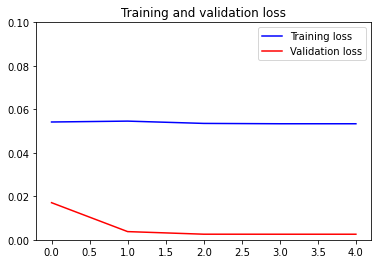

In [107]:
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.title('Training and validation loss')
plt.ylim(0,0.1) #On zoome pour regarder en détail
legend = plt.legend()
plt.show()